# Fashion-Mnist

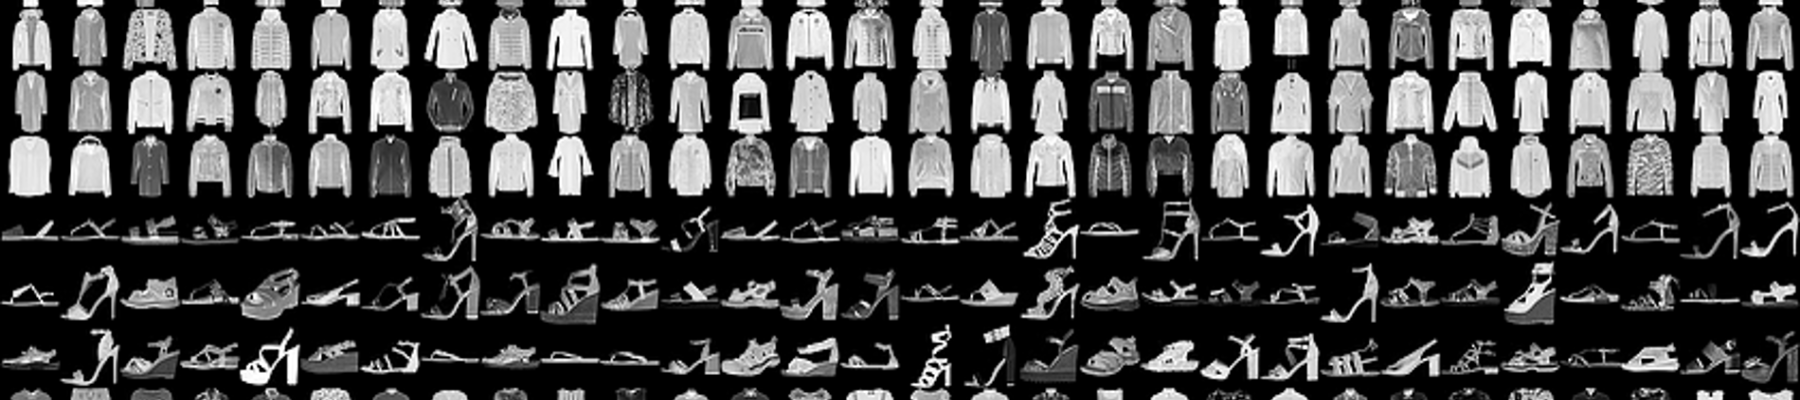

*Classes:*<br>
* 0 => T-shirt/top <br>
* 1 => Trouser <br>
* 2 => Pullover<br>
* 3 => Dress<br>
* 4 => Coat<br>
* 5 => Sandal<br>
* 6 => Shirt<br>
* 7 => Sneaker<br>
* 8 => Bag<br>
* 9 => Ankle boot<br>

### Imports

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras.datasets import fashion_mnist
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import warnings                                     
warnings.filterwarnings("ignore")

### Loading the dataset

In [159]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [160]:
X_train.shape

(60000, 28, 28)

### Let's show now a sample of pictures


In [161]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

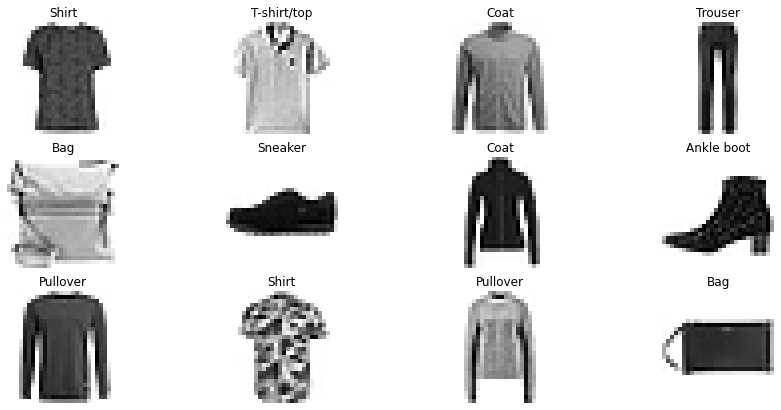

In [162]:
plt.figure(figsize=(15,7))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    rand_index=random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(label_names[y_train[rand_index]])

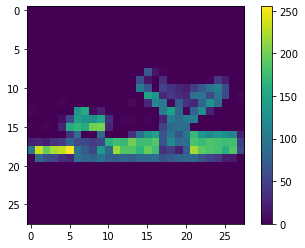

In [163]:
plt.figure()
plt.imshow(X_train[59999])
plt.colorbar()
plt.grid(False)
plt.show()

### Create to dataframe object 
We will create Data Frame to see visualization of the Fashion-Mnist data set

In [164]:
X_train_copy=X_train.copy()
X_train_copy=X_train_copy.reshape(60000,784,)
y_train_copy=y_train.copy()
y_train_copy=y_train_copy.reshape(60000,)


In [165]:
images=pd.DataFrame(X_train_copy)
labels=pd.DataFrame(y_train_copy)
labels.columns=['Labels']
fashion=pd.concat([images,labels],axis=1)
fashion

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


#### Change columns names for better visualization

In [166]:
columnsNames=[]
for i in range (1,785):
    label='pixel'+str(i)
    columnsNames.append(label)
columnsNames.append('Labels')
fashion.columns = columnsNames
fashion.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'Labels'],
      dtype='object', length=785)

In [167]:
fashion.Labels.replace([0,1,2,3,4,5,6,7,8,9],['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot'], inplace=True)

In [168]:
fashion

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ankle_boot
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,T-shirt
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,T-shirt
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,Dress
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sandal
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Trouser
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,Dress
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,T-shirt


### Let us inspect the number of samples for each category
Data separate by type of clothes

<AxesSubplot:ylabel='Labels'>

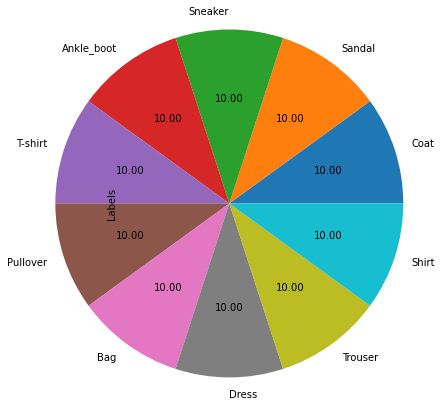

In [169]:
fashion["Labels"].value_counts().plot(kind = "pie", autopct = "%.2f",radius=2 )


In [170]:
fashion.Labels.value_counts()

Coat          6000
Sandal        6000
Sneaker       6000
Ankle_boot    6000
T-shirt       6000
Pullover      6000
Bag           6000
Dress         6000
Trouser       6000
Shirt         6000
Name: Labels, dtype: int64

###### We can see our data set is balcaned

### Scale the data

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000, 784)
y_train = y_train.reshape(60000,1)
y_test = y_test.reshape(10000,1)

In [171]:
fashion.Labels.replace(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot'],[0,1,2,3,4,5,6,7,8,9], inplace=True)
fashion_pca=fashion.copy()


In [172]:
columnsNames.remove('Labels')
fashion_pca[columnsNames]=fashion_pca[columnsNames]/255.0
fashion_pca

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Labels
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0,0


### PCA
We will use PCA to lower dimensions.
We can download a large number of dimensions that will not significantly harm the percentage of the variance of the data.
Advantages of lowering dimensions:
1. Run the code much faster.
2. The model creates more inclusive.
3. Allows visualization of the data to be made easier


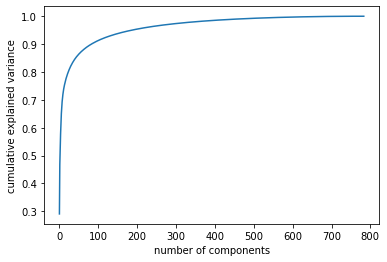

In [175]:
pca = PCA().fit(X_train.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

###### From the graph, we can see that in about 50 dimensions we already have 80% variance.
We will focus on 95% percent variance.

In [176]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train.data)
X_test_reduced=pca.transform(X_test)
X_train_reduced.shape

(60000, 187)

##### At 0.95 the number of components is 187

###### We will examine how each component explains the variance

In [177]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267 0.00992875 0.00913255
 0.00765793 0.00659706 0.00607851 0.00589821 0.00551934 0.005245
 0.00458079 0.00455515 0.00433684 0.00407097 0.00384758 0.00372551
 0.00361107 0.00350656 0.00333241 0.0031936  0.00308063 0.00293273
 0.00275603 0.00265062 0.00263703 0.00255835 0.00246212 0.00235901
 0.0023029  0.00225522 0.00218476 0.00209324 0.00200282 0.0019574
 0.00194689 0.00182783 0.00175354 0.00171926 0.00168792 0.00163975
 0.00160908 0.00154846 0.00152295 0.00150044 0.00146795 0.00143312
 0.00138277 0.00136997 0.00131154 0.00128846 0.00127249 0.00125851
 0.00121452 0.00120198 0.00118143 0.00116257 0.00115583 0.00112295
 0.00111075 0.00109669 0.00105128 0.00104659 0.001031   0.00101051
 0.00097795 0.00095689 0.00093915 0.00093383 0.00092531 0.00090256
 0.00089325 0.00087182 0.00085407 0.00084291 0.00082514 0.00081422
 0.00080513 0.000797

###### The first component explains 29% of the variance and the second component explains 17% of the variance.
We will append the two dimensional PCA values as columns to the fashion_pca dataframe

In [178]:
fashion_pca['First Dimension'] = X_train_reduced[:,0]
fashion_pca['Second Dimension'] = X_train_reduced[:,1] 


In [179]:
fashion_pca

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Labels,First Dimension,Second Dimension
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,9,-0.486250,6.404213
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0,0,5.521290,-1.771142
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,-2.846709,-4.320934
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3,0.123132,-3.847324
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,3.153409,-4.710466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5,-6.765072,-0.163069
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,-0.107906,-5.703627
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3,3.363726,-4.628393
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0,0,-3.166575,-2.279290


<AxesSubplot:xlabel='First Dimension', ylabel='Second Dimension'>

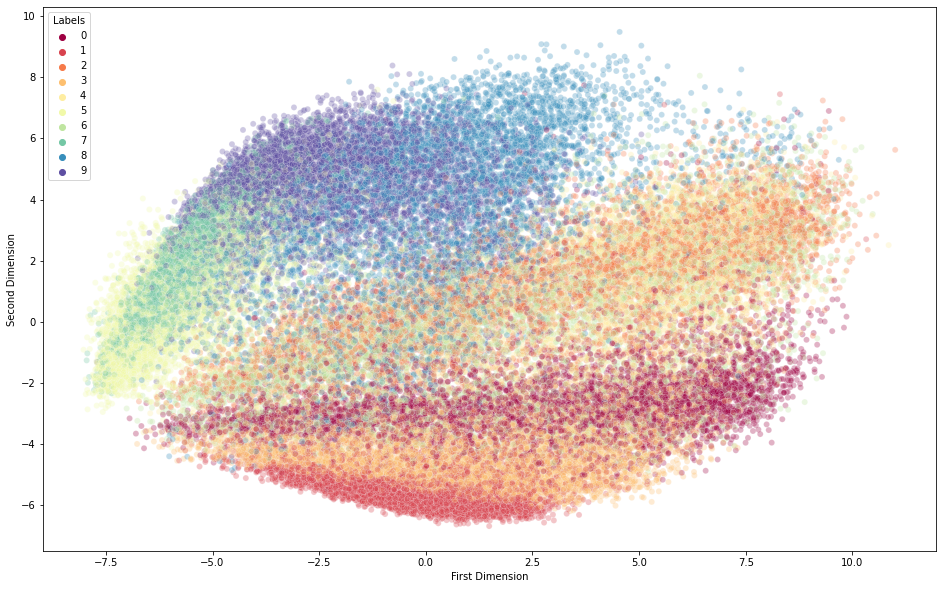

In [180]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue = "Labels",
    palette=sns.color_palette("Spectral", as_cmap=True),
    data=fashion_pca,
    legend="full",
    alpha=0.3
)

##### From the graph above, we can see the two components can separate different categories apart to some degree.

## Models

#### Dummy model

In [181]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_reduced, y_train)

dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.1

#### Our dummy model gives 10% that is very low because our data is balanced
We have a great reason to look for another model that will give us a better score

### KNN

In [182]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

k_range = list(range(1,31,2))


scores_accuracy  = []



k_mean_score_accuracy  = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_accuracy  = cross_val_score(knn, X_train_reduced, y_train, cv=kf, scoring= 'accuracy')
    
    
   
    k_mean_score_accuracy.append(scores_accuracy .mean())
    

d = { 'k_mean_accuarcy' : k_mean_score_accuracy  }
Ks = pd.DataFrame(data = d, index=k_range)

In [183]:
Ks

,k_mean_accuarcy
1,0.852717
3,0.858900
5,0.862400
7,0.862333
9,0.861017
11,0.859283
13,0.858050
15,0.856533
17,0.855150
19,0.853983


In [184]:
Ks[Ks['k_mean_accuarcy']==max(Ks['k_mean_accuarcy'])]


,k_mean_accuarcy
5,0.8624


#### Our best score is: 86.2% with 5 neighbors

#### Let's try to improve the model with grid search

In [186]:
kf = KFold(n_splits=3, random_state=42, shuffle=True)
k_range = list(range(1,15,2))
weights = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan']
param_grid = dict(n_neighbors = k_range , weights=weights,metric=metrics_options)
grid = GridSearchCV(knn , param_grid , cv = kf , scoring= 'accuracy')
grid.fit(X_train_reduced, y_train)
gs = pd.DataFrame(grid.cv_results_)[['mean_test_score' ,  'params' ]].set_index('params')
gs

,mean_test_score
params,
"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",0.849067
"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}",0.849067
"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",0.856233
"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}",0.857483
"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",0.860683
"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}",0.861867
"{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}",0.859733
"{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}",0.861000
"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}",0.858867


In [187]:
print(grid.best_score_)
print(grid.best_params_)

0.8640666666666666
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


##### As we can see our best K is 5 with 0.864% success.
After using grid search we find the best hyperparameters are : <br>
metric- manhattan <br>
weights- distance

## Split the train 

#### We will split the train to "test2" 

In [188]:
X_train2, x_test2, y_train2, y_test2 = train_test_split(X_train_reduced, y_train, test_size=0.2, random_state=42)
print(" Shape of X_train2 = ", X_train2.shape)
print(" Shape of x_test2 = ", x_test2.shape)
print(" Shape of y_train2 = ", y_train2.shape)
print(" Shape of y_test2 = ", y_test2.shape)

 Shape of X_train2 =  (48000, 187)
 Shape of x_test2 =  (12000, 187)
 Shape of y_train2 =  (48000, 1)
 Shape of y_test2 =  (12000, 1)


## Random Forst

We will take a large number of decision trees with a small depth, from a certain number it is better to take a large number of decision trees with a small depth than to take a small number of decision trees with a large depth

In [195]:
forest = RandomForestClassifier(n_estimators=100 , n_jobs = -1, random_state =42, 
                                  max_depth=50)
forest.fit(X_train2, y_train2)
prediction =forest.predict(x_test2)
accuracy_score = metrics.accuracy_score(y_test2, prediction)

print("The accuracy score of Random forest is:"+str(accuracy_score))

The accuracy score of Random forest is:0.86325


## Boosting
Purpose Of increase is to take a collection of weak models and with their help create a strong model when they have managed to  be the each weak learner becomes a strong learner by constructing a linear combination of classifiers created with the help of the weak learner

## XGBoost

In [190]:
xgb = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
xgb.fit(X_train2,y_train2)
prediction = xgb.predict(x_test2)
accuracy_score = metrics.accuracy_score(y_test2, prediction)
print("The accuracy score of XGBoost is:"+str(accuracy_score))

The accuracy score of XGBoost is:0.8826666666666667


## AdaBoost

In [194]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200)
ada.fit(X_train2,y_train2)
prediction = ada.predict(x_test2)
accuracy_score = metrics.accuracy_score(y_test2, prediction)
print("The accuracy score of AdaBoost is:"+str(accuracy_score))

The accuracy score of AdaBoost is:0.7105833333333333


## Voting classifier
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

In [215]:
estimators=[('LR', LogisticRegression()),('RF',RandomForestClassifier()),('DT', DecisionTreeClassifier()),('ADA',AdaBoostClassifier())]



### Hard Voting
Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

In [216]:
vot_hard = VotingClassifier(estimators = estimators, voting ='hard')
vot_hard.fit(X_train2, y_train2)
prediction = vot_hard.predict(x_test2)
accuracy_score = metrics.accuracy_score(y_test2, prediction)
print("The accuracy score of Hard Voting is:"+str(accuracy_score))

The accuracy score of Hard Voting is:0.8451666666666666


### Soft Voting
Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [217]:
vot_soft = VotingClassifier(estimators = estimators, voting ='soft')
vot_soft.fit(X_train2, y_train2)
prediction = vot_soft.predict(x_test2)
accuracy_score = metrics.accuracy_score(y_test2, prediction)
print("The accuracy score of Soft Voting is:"+str(accuracy_score))

The accuracy score of Soft Voting is:0.8209166666666666


### Choose the best model and final test
Our best model is XGBoost

In [221]:
XGB_final_model = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
XGB_final_model.fit(X_train_reduced , y_train)
XGB_final_predict = XGB_final_model.predict(X_test_reduced)
metrics.accuracy_score(y_test , XGB_final_predict)
print("The accuracy of XGB final model is: " + str(metrics.accuracy_score(y_test , XGB_final_predict)))

The accuracy of XGB final model is: 0.8729


#### Confusion matrix for final model


In [241]:
ConfusionMatrixTest=confusion_matrix(y_test , XGB_final_predict)
ConfusionMatrixTestDisplay=ConfusionMatrixDisplay(ConfusionMatrixTest, display_labels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix XGB")
ConfusionMatrixTestDisplay.plot(ax=ax)

TypeError: __init__() got an unexpected keyword argument 'cmap'

<AxesSubplot:>

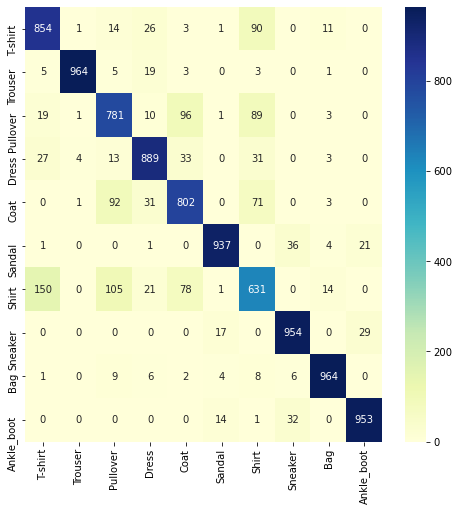

In [250]:
con_mat = confusion_matrix(y_test , XGB_final_predict)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu",
            xticklabels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot'],
            yticklabels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot'])


## The best XGB final model score of the test is: 0.87%